# 2023B Testing lab sparkles synched
This is after getting the camera fixed

In [2]:
from astropy.io import fits
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tempfile
import imageio
from scipy import signal
from importlib import reload
from scipy.optimize import curve_fit
import pandas as pd
# importing the new code
import sparkles.spark as spkl
import sparkles.spark_lab as slab
import sparkles.spark_plots as splot

In [3]:
reload(slab)

<module 'sparkles.spark_lab' from '/home/eden/code/sparkles/sparkles/spark_lab.py'>

# long lab test

In [4]:
lab_long_dir = '/home/eden/data/2024Aa/sparkle_sync_longLAB/'
lab_files = lab_long_dir +'camwfs/'
lab_ref = 'lab_ref.fits'
lab_dot_roll = 'lab_splits_total_list.npy'

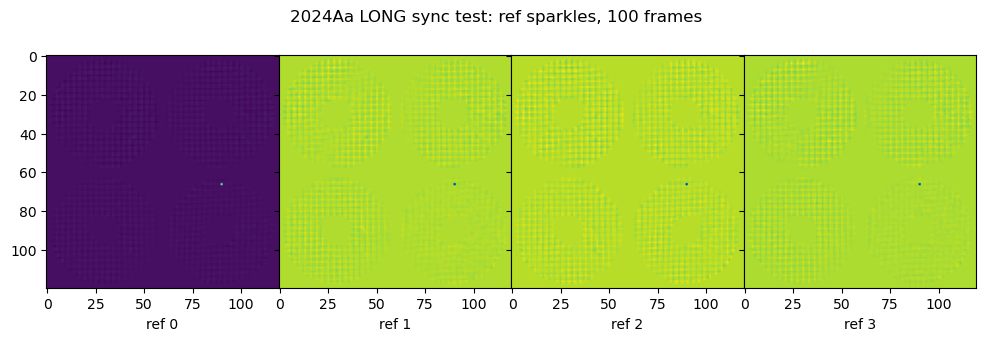

In [8]:
#checking the lab reference: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)
plt.suptitle(f"2024Aa LONG sync test: ref sparkles, 100 frames", y=0.90)

lab_ref_data = fits.open(lab_long_dir + lab_ref)[0].data

for e in range(4):
    axs[e].imshow(lab_ref_data[e], label = f'ref {e}')
    axs[e].set_xlabel(f"ref {e}")

plt.show()

In [18]:
reload(slab)

<module 'sparkles.spark_lab' from '/home/eden/code/sparkles/sparkles/spark_lab.py'>

In [62]:
# check the rolls reference
roll_data = np.load(lab_long_dir + lab_dot_roll)
roll_data_split = np.array([roll_data.T[:,i::4] for i in range(4)])
roll_data_split_T = np.swapaxes(roll_data_split, 0, 1)
unrolled_data = np.array(spkl.split_data_roll(roll_data))

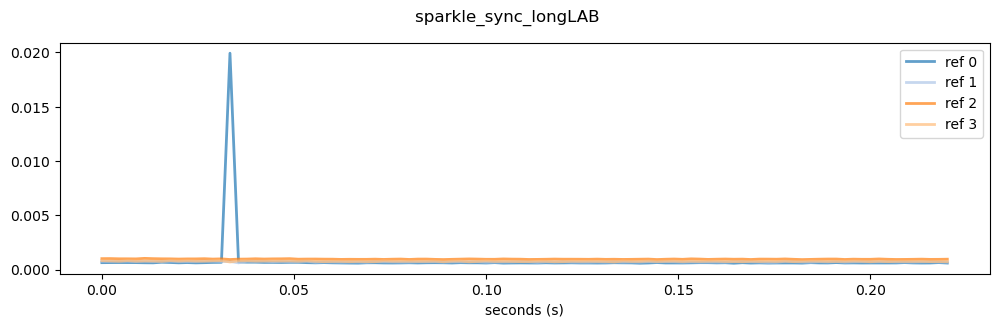

In [135]:
# check the rolls reference
slab.plot_time_series(unrolled_data[:, 0:100], lab_long_dir, 'sparkle_sync_longLAB', hz = 1800, params=False)
plt.show()

In [63]:
unrolled_data.shape

(4, 2717250)

In [95]:
n = 0
print('min', np.min(unrolled_data[n]))
print('avg', np.mean(unrolled_data[n]))
print('max', np.max(unrolled_data[n]))

min 0.00051266805
avg 0.00061952637
max 0.019929115


In [109]:
# trying to figure out big peak
peaks = unrolled_data[0]
peak_val = np.argwhere(peaks > 0.01)[:,0]
diffs = np.diff(peak_val)
diff_val = np.diff(peaks[peak_val])

In [111]:
peak_val

array([[     15],
       [  54360],
       [ 108705],
       [ 163050],
       [ 217395],
       [ 271740],
       [ 326085],
       [ 380430],
       [ 434775],
       [ 489120],
       [ 543465],
       [ 597810],
       [ 652155],
       [ 706500],
       [ 760845],
       [ 815190],
       [ 869535],
       [ 923880],
       [ 978225],
       [1032570],
       [1086915],
       [1141260],
       [1195605],
       [1249950],
       [1304295],
       [1358640],
       [1412985],
       [1467330],
       [1521675],
       [1576020],
       [1630365],
       [1684710],
       [1739055],
       [1793400],
       [1847745],
       [1902090],
       [1956435],
       [2010780],
       [2065125],
       [2119470],
       [2173815],
       [2228160],
       [2282505],
       [2336850],
       [2391195],
       [2445540],
       [2499885],
       [2554230],
       [2608575],
       [2662920]])

In [5]:
# what is with this thing????
sp_24B_sync_spark = spkl.Spark(lab_files, lab_files, spkl.glob_dir_calib, spkl.glob_dark, spkl.glob_ref, spkl.glob_dark) 

HZ value: 3623
HZ value: 3623
Number of DATA files:  36230
Number of REF files:  36230
MOD : 1   TRIG : 1   FREQ : 1800   SEPS : 20   ANGS : 0   AMPS : 0.02   CROSS : 1  
MOD : 1   TRIG : 1   FREQ : 1800   SEPS : 20   ANGS : 0   AMPS : 0.02   CROSS : 1  
Found saved lab ref at:  /home/eden/data/2024Aa/sparkle_sync_longLAB/lab_ref.fits


In [6]:
sample_info = sp_24B_sync_spark.file_sample_n_clean(lab_files, 100, n_start=0, norm=True)

=> Sampling 100 files, starting at 0


In [11]:
sample_img = np.array([si[0] for si in sample_info])

In [12]:
sample_img.shape

(100, 120, 120)

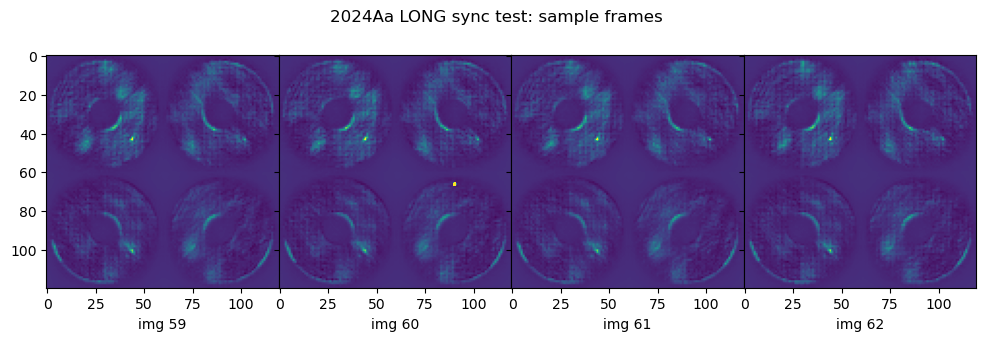

In [133]:
#checking the raw data: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)
plt.suptitle(f"2024Aa LONG sync test: sample frames", y=0.90)

for e in range(4):
    idx =  59 +e
    axs[e].imshow(sample_img[idx], vmin = -8e-5, vmax=5e-4)
    axs[e].set_xlabel(f"img {idx}")
    

plt.show()

In [130]:
#checking min and max between two frames

print('normal frame n=56')
print('avg', np.mean(sample_img[56]))
print('min', np.min(sample_img[56]))
print('max', np.max(sample_img[56]))
print('BAD frame n=60')
print('avg', np.mean(sample_img[60]))
print('min', np.min(sample_img[60]))
print('max', np.max(sample_img[60]))

normal frame n=56
avg 5.6914157e-12
min -8.034869e-05
max 0.0005647494
BAD frame n=60
avg 7.7610216e-13
min -8.759191e-05
max 0.014847238


## Multiple sparkle parameter rolls

In [4]:
# common directories
data_dir = '/home/eden/data/LAB_2023B/'
lab_dir = '/home/eden/data/2023A/LAB/'
RM_dir = "/home/eden/data/self_RMs/"
# calibration files
dir_calib = '../data/calib/'
mask = 'aol1_wfsmask.fits'
ref = 'aol1_wfsref.fits'
dark = 'camwfs-dark_bin2_2000.000000_600.000000_-45.000000__T20220422005142597501326.fits'

In [5]:
os.listdir(data_dir)

['sparkle_synch_test_20231218T201512',
 'sparkle_synch_test_20231218T201724',
 'data_splits_list_syncspark.npy',
 'unsync_sparkles_1khz_dark_20231221T213710',
 'synd_sparkles_1khz_20231221T220804',
 'sync_sparkles_1khz_dark_20231221T220206',
 'unsync_sparkles_1khz_20231221T214447',
 'data_splits_stack_sync_23B.npy',
 'data_splits_stack_unsync_23B.npy',
 'data_roll_stack_sync_23B.npy',
 'duty_cycle_tests',
 'pwfs_emg20_sync_open_20240207',
 'pwfs_emg20_sync_shut_20240207',
 'spark_emg20_sync_amp02_sep22',
 'spark_emg20_sync',
 'spark_emg20_unsync',
 'spark_emg20_sync_amp02_sep15',
 'spark_emg20_sync_amp05_sep15',
 'spark_emg20_sync_amp01_sep20',
 'spark_emg20_sync_amp02_sep20',
 'spark_emg20_sync_amp05_sep20',
 'data_roll_stack_spark_emg20_sync_amp02_sep22_data_roll.npy',
 'data_roll_stack_spark_emg20_sync_amp02_sep22.npy']

In [10]:
lab_list = [
 'spark_emg20_sync_amp02_sep15',
 'spark_emg20_sync_amp05_sep15',
 'spark_emg20_sync_amp01_sep20',
 'spark_emg20_sync_amp02_sep20',
 'spark_emg20_sync_amp05_sep20',
 'spark_emg20_sync_amp02_sep22',]


## Plots for lab data processing 

In [28]:
reload(slab)

<module 'sparkles.spark_lab' from '/home/eden/code/sparkles/sparkles/spark_lab.py'>

In [7]:
## Synched lab data
lab_dir = '/home/eden/data/LAB_2023B/'
sync_23B_dark = 'dark_sync_sparkles_1khz_dark_20231221T220206.fits'

In [9]:
# ONLY DO THIS ONCE

### STOP< HAVE YOU ALREADY DONE THIS??
for f_tmp in lab_list:
    sync_dir = lab_dir + f_tmp + '/camwfs/'
    roll_file =  f_tmp
    tmp_sync_spark = spkl.Spark(sync_dir, sync_dir, spkl.glob_dir_calib, sync_23B_dark, spkl.glob_ref, spkl.glob_dark) 
    data_roll_stack = slab.proc_lab_data_roll(tmp_sync_spark, lab_dir, filename = roll_file)

HZ value: 3600
HZ value: 3600
Number of DATA files:  37043
Number of REF files:  37043
MOD : 1   TRIG : 1   FREQ : 2000   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  
MOD : 1   TRIG : 1   FREQ : 2000   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  
GENERATING REFERENCE
=> Sampling 100 files, starting at 0
File count: 37043, Block size: 40000, Blocks: 1
Start roll orientation 0
START: Block 0 starting with file 0!
ERROR: changing n_end to file count
chunksize=1852, n_workers=20
Start roll orientation 1
START: Block 0 starting with file 0!
ERROR: changing n_end to file count
chunksize=1852, n_workers=20
Start roll orientation 2
START: Block 0 starting with file 0!
ERROR: changing n_end to file count
chunksize=1852, n_workers=20
Start roll orientation 3
START: Block 0 starting with file 0!
ERROR: changing n_end to file count
chunksize=1852, n_workers=20
SAVED: /home/eden/data/LAB_2023B//data_roll_stack_spark_emg20_sync_amp02_sep15.npy
HZ value: 3600
HZ value: 3600
Number of DATA fil

## Look through all files, see what the rolls are like:

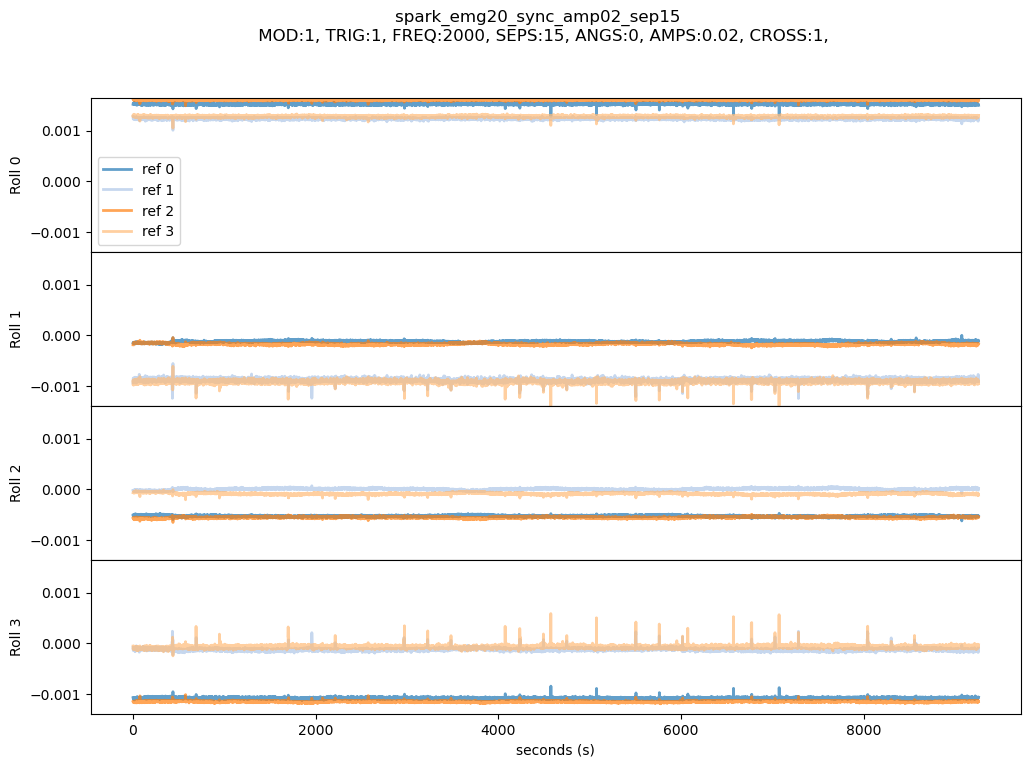

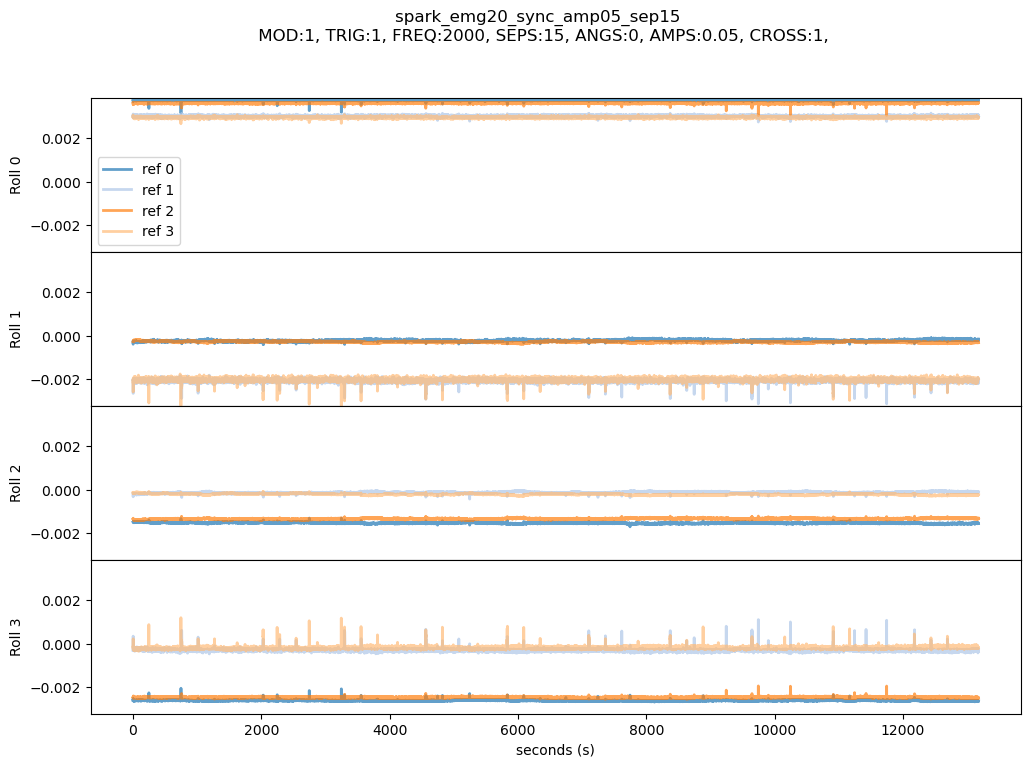

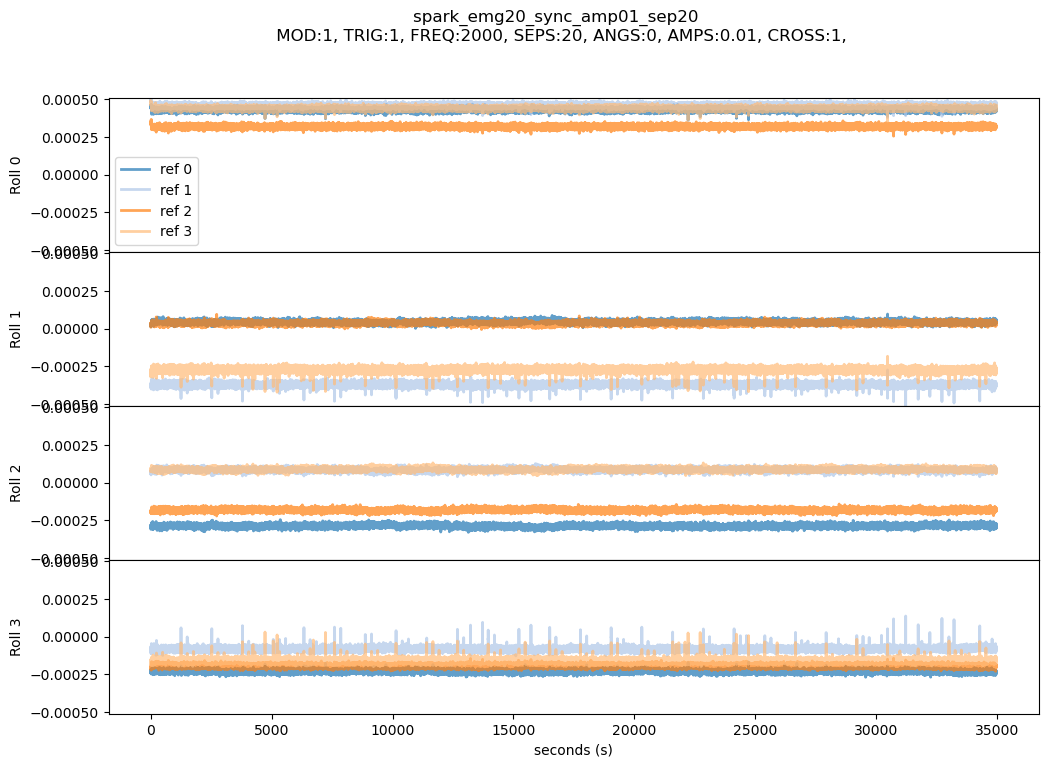

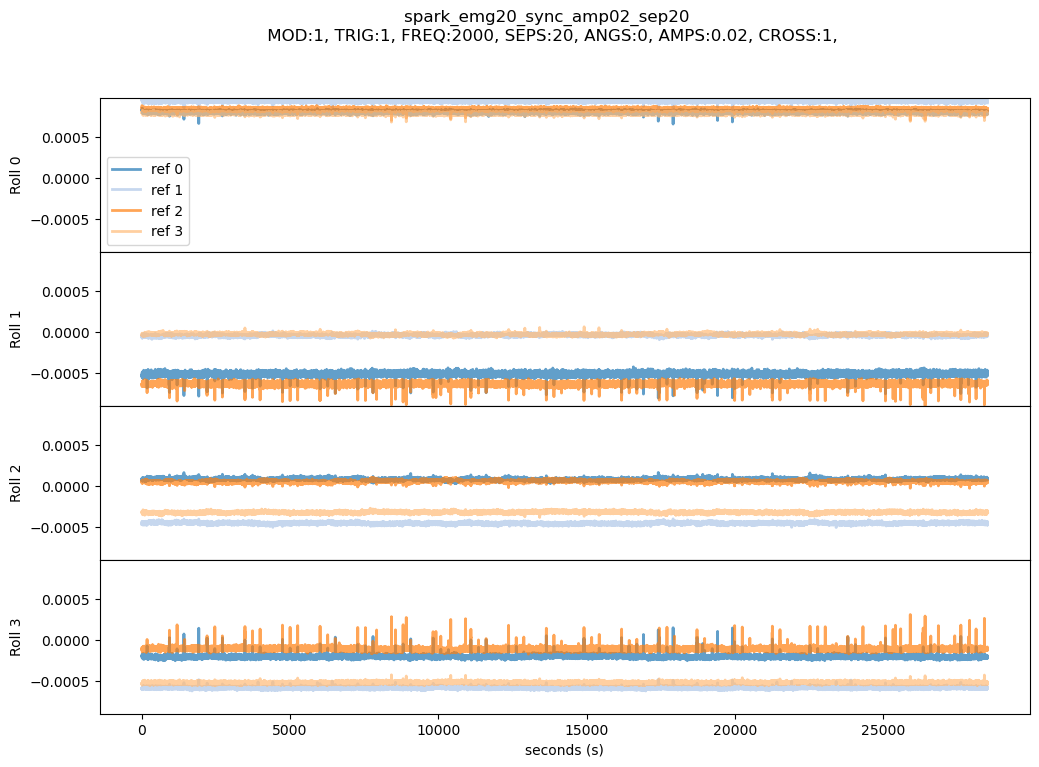

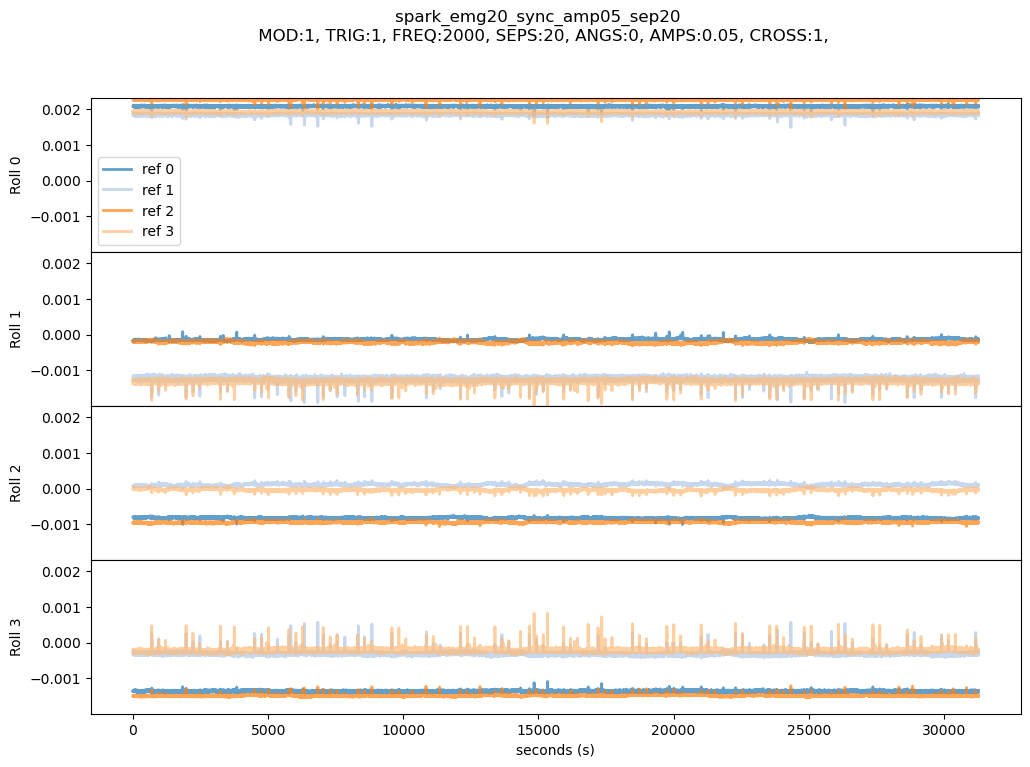

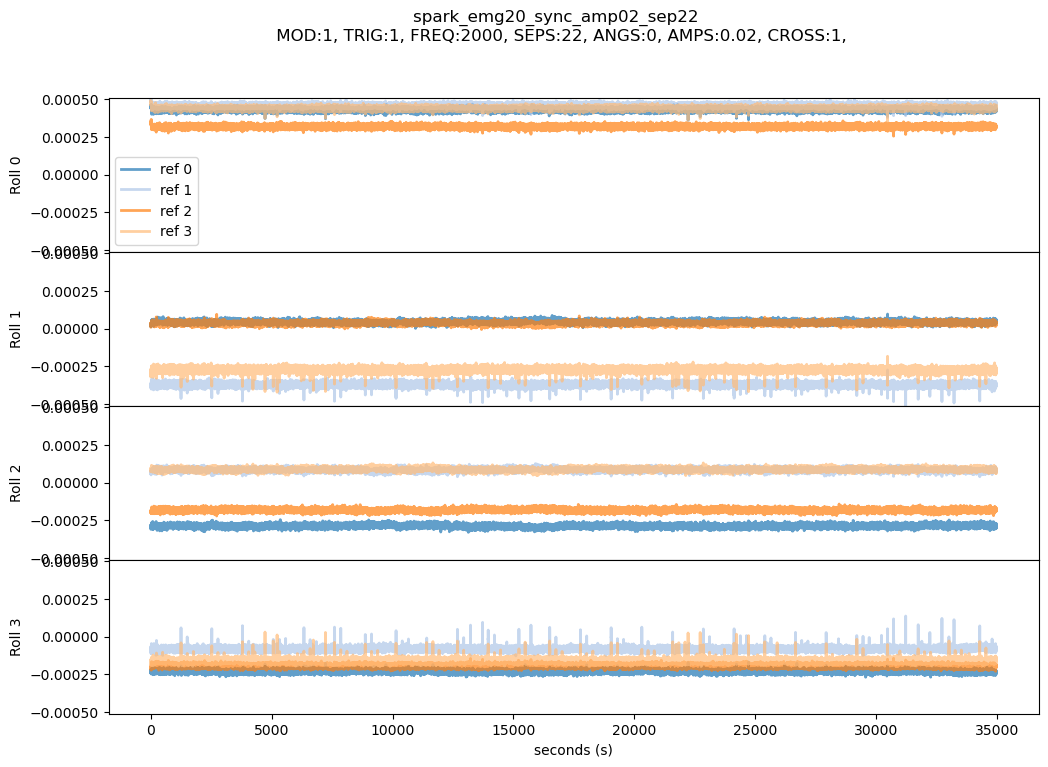

In [11]:
for f_tmp in lab_list:
    sync_dir = lab_dir + f_tmp + '/camwfs/'
    roll_file = f"{lab_dir}/data_roll_stack_{f_tmp}.npy"
    roll_data = np.load(roll_file)
    slab.plot_time_series_roll(roll_data, sync_dir, f_tmp, n_avg = 1000, hz = 1000)
    plt.show()
